In [1]:
import pandas as pd
from scipy.stats import pearsonr
from numpy import isnan
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Load training data
train = pd.read_csv("C:\\Users\\aadii\\train.csv")

# Load test data
test = pd.read_csv("C:\\Users\\aadii\\test.csv")

# Take a look at the training data
display(train.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
print("\nSurvived values are:", train.Survived.unique())
print("\nPclass values are:", train.Pclass.unique())
print("\nSex values are:", train.Sex.unique())
print("\nSibSp values are:", train.SibSp.unique())
print("\nParch values are:", train.Parch.unique())
print("\nEmbarked values are:", train.Embarked.unique())


Survived values are: [0 1]

Pclass values are: [3 1 2]

Sex values are: ['male' 'female']

SibSp values are: [1 0 3 4 2 5 8]

Parch values are: [0 1 2 5 3 4 6]

Embarked values are: ['S' 'C' 'Q' nan]


In [5]:
corr, _ = pearsonr(train.Fare, train.Pclass)
print("Pearson correlation between Fare and Pclass: r = {:.3f}".format(corr))

Pearson correlation between Fare and Pclass: r = -0.549


In [6]:
# Check correlation of SibSp and Parch
corr, _ = pearsonr(train.SibSp, train.Parch)
print("Pearson correlation between SibSp and Parch: r = {:.3f}".format(corr))

Pearson correlation between SibSp and Parch: r = 0.415



Pearson correlation between SibSp and Survived: r = -0.035



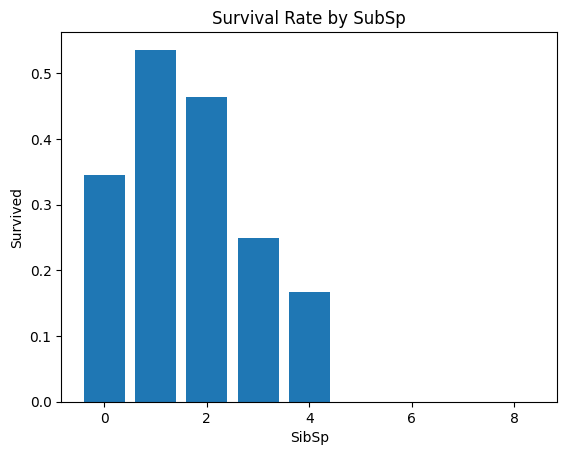


Pearson correlation between Parch and Survived: r = 0.082



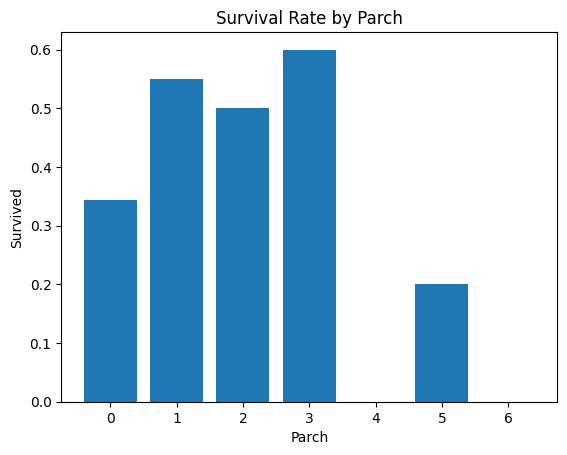

In [7]:
corr, _ = pearsonr(train.SibSp, train.Survived)
print("\nPearson correlation between SibSp and Survived: r = {:.3f}\n".format(corr))

# Plotting Survived vs. SibSp or Parch doesn't help, since Survived = (0, 1); plot survival rate for each group instead
# Get a list of the survival rates for each SibSp value; FOR loop that iterates up to the max value (6); add 1 to include 6
SibSp_surv = []
for i in range(train.SibSp.max() + 1):
    surv = train[train.SibSp == i]["Survived"]
    
    # Use IF statement to check that surv has values, otherwise division by zero error will result
    if len(surv) > 0:
        SibSp_surv.append(sum(surv) / len(surv))
    else:
        SibSp_surv.append(0)

plt.bar(range(train.SibSp.max() + 1), SibSp_surv)
plt.xlabel("SibSp")
plt.ylabel("Survived")
plt.title("Survival Rate by SubSp")
plt.show()
corr, _ = pearsonr(train.Parch, train.Survived)
print("\nPearson correlation between Parch and Survived: r = {:.3f}\n".format(corr))

# Get a list of the survival rates for each Parch value; FOR loop that iterates up to the max value (8); add 1 to include 8
Parch_surv = []
for i in range(train.Parch.max() + 1):
    surv = train[train.Parch == i]["Survived"]
    
    # Use IF statement to check that surv has values, otherwise division by zero error will result
    if len(surv) > 0:
        Parch_surv.append(sum(surv) / len(surv))
    else:
        Parch_surv.append(0)

plt.bar(range(train.Parch.max() + 1), Parch_surv)
plt.xlabel("Parch")
plt.ylabel("Survived")
plt.title("Survival Rate by Parch")
plt.show()

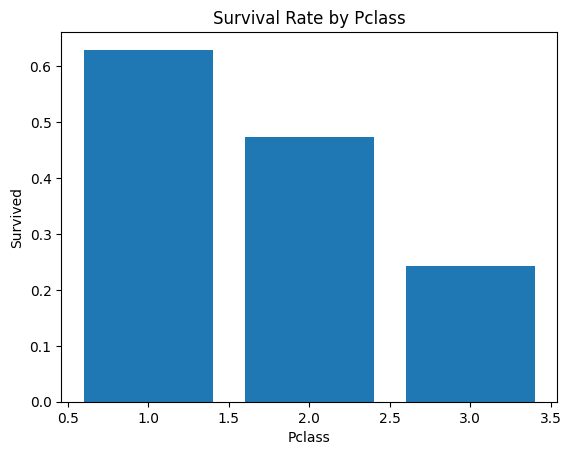

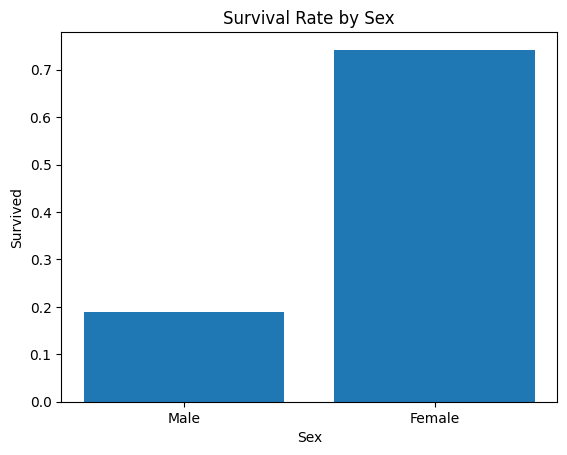

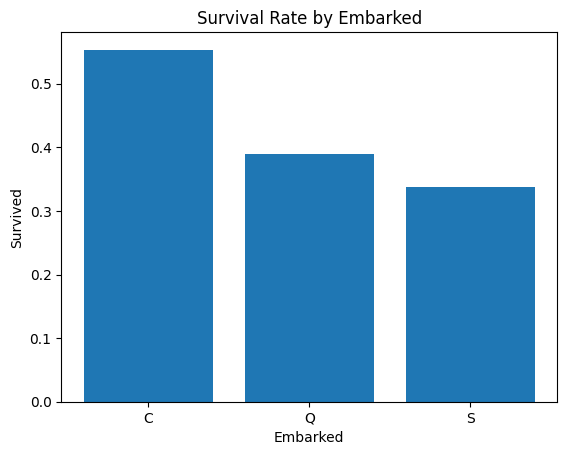

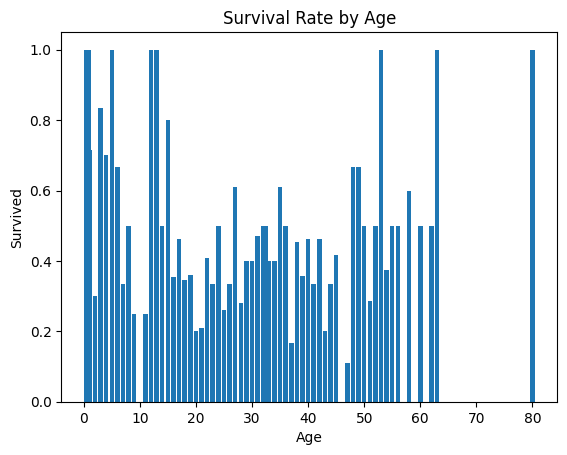

In [8]:
# Get a list of the survival rates for each Pclass value; FOR loop that iterates up to the max value (3)

Pclass_surv = []
for i in range(train.Pclass.max()):
    surv = train[train.Pclass == i + 1]["Survived"]
    
    # Use IF statement to check that surv has values, otherwise division by zero error will result
    if len(surv) > 0:
        Pclass_surv.append(sum(surv) / len(surv))
    else:
        Pclass_surv.append(0)

plt.bar([1, 2, 3], Pclass_surv)
plt.xlabel("Pclass")
plt.ylabel("Survived")
plt.title("Survival Rate by Pclass")
plt.show()
# Get a list of the survival rates for each Sex

men_surv = train[train.Sex == "male"]["Survived"]
men_surv_rate = sum(men_surv) / len(men_surv)
women_surv = train[train.Sex == "female"]["Survived"]
women_surv_rate = sum(women_surv) / len(women_surv)

plt.bar(['Male', 'Female'], [men_surv_rate, women_surv_rate])
plt.xlabel("Sex")
plt.ylabel("Survived")
plt.title("Survival Rate by Sex")
plt.show()
# Get a list of the survival rates for each Embarked value

C_surv = train[train.Embarked == "C"]["Survived"]
C_surv_rate = sum(C_surv) / len(C_surv)
Q_surv = train[train.Embarked == "Q"]["Survived"]
Q_surv_rate = sum(Q_surv) / len(Q_surv)
S_surv = train[train.Embarked == "S"]["Survived"]
S_surv_rate = sum(S_surv) / len(S_surv)


plt.bar(['C', 'Q', 'S'], [C_surv_rate, Q_surv_rate, S_surv_rate])
plt.xlabel("Embarked")
plt.ylabel("Survived")
plt.title("Survival Rate by Embarked")
plt.show()
# Get a list of the survival rates for each Age; use a FOR loop to iterate over elements of the list of unique Ages
age_unique = train.Age.unique()
age_unique = age_unique[~isnan(age_unique)]
age_unique.sort()

age_surv_rate = []
for age in age_unique:
    age_surv = train[train.Age == age]["Survived"]
    
    # Use IF statement to check that age_surv has values, otherwise division by zero error will result
    if len(age_surv) > 0:
        age_surv_rate.append(sum(age_surv) / len(age_surv))
    else:
        age_surv_rate.append(0)
        
plt.bar(age_unique, age_surv_rate)
plt.xlabel("Age")
plt.ylabel("Survived")
plt.title("Survival Rate by Age")
plt.show()

The number of missing values for each column is shown below:

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


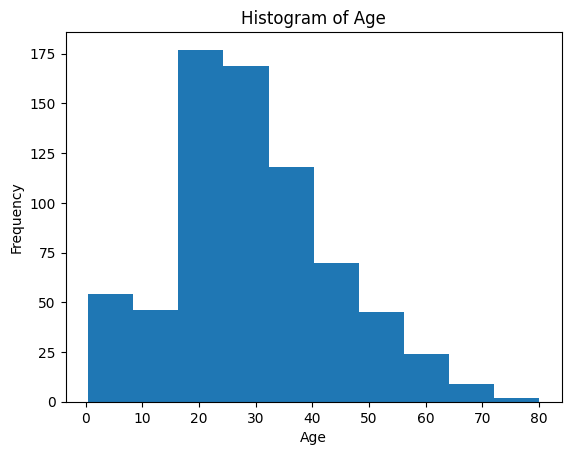


The number of missing values for each column after imputation is shown below:

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64


In [9]:
# Check again for missing values
print("The number of missing values for each column is shown below:\n")
print(train.isnull().sum())

# Plot a histogram of Age, to see how to impute its missing values
plt.hist(train.Age)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Histogram of Age")
plt.show()

# Distribution of ages is skewed to the right. Impute with mode (most_frequent) 
from sklearn.impute import SimpleImputer
mode_imputer = SimpleImputer(strategy='most_frequent')

# Apply imputer on Age and Embarked columns
impute_columns = ['Age', 'Embarked']
train[impute_columns] = mode_imputer.fit_transform(train[impute_columns])

# Check for missing values after imputation
print("\nThe number of missing values for each column after imputation is shown below:\n")
print(train.isnull().sum())

# Create a copy of train data
X = train.copy()

# Create Relatives predictor by adding SibSp and Parch; insert into X
X.insert(0, "Relatives", train.SibSp + train.Parch, True)

# Select features Relatives, Pclass, and Age; create new dataframe, X, that will be used in model building
features = ['Relatives', 'Pclass', 'Age']
X = X[features]

# Apply Label Encoder to Sex to transform it into 0s and 1s; insert back into X dataset
Sex_encoded = LabelEncoder().fit_transform(train.Sex)
X.insert(0, "Sex_encoded", Sex_encoded, True)

# Apply One-Hot encoding to Embarked; add back into X dataset
Embarked = pd.get_dummies(train.Embarked)
X = X.join(Embarked)

# Isolate Survived from train data
y = train["Survived"]

In [10]:
print("The number of missing values for each column is shown below:\n")
print(test.isnull().sum())

# Distribution of ages is skewed to the right. Impute with mode (most_frequent) 
from sklearn.impute import SimpleImputer
mode_imputer = SimpleImputer(strategy='most_frequent')

# Apply imputer on Age column
test['Age'] = mode_imputer.fit_transform(test['Age'].values.reshape(-1, 1))

# Check for missing values after imputation
print("\nThe number of missing values for each column after imputation is shown below:\n")
print(test.isnull().sum())
# Create a copy of train data
X_test = test.copy()

# Create Relatives predictor by adding SibSp and Parch; insert into X_test
X_test.insert(0, "Relatives", test.SibSp + test.Parch, True)

# Select features Relatives, Pclass, and Age; create new dataframe, X_test, that will be used in model building
features = ['Relatives', 'Pclass', 'Age']
X_test = X_test[features]

# Apply Label Encoder to Sex to transform it into 0s and 1s; insert back into X_test dataset
Sex_encoded = LabelEncoder().fit_transform(test.Sex)
X_test.insert(0, "Sex_encoded", Sex_encoded, True)

# Apply One-Hot encoding to Embarked; add into X_test dataset
Embarked = pd.get_dummies(test.Embarked)
X_test = X_test.join(Embarked)

The number of missing values for each column is shown below:

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

The number of missing values for each column after imputation is shown below:

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [11]:
display(X_test.head())

,Sex_encoded,Relatives,Pclass,Age,C,Q,S
0,1,0,3,34.5,0,1,0
1,0,1,3,47.0,0,0,1
2,1,0,2,62.0,0,1,0
3,1,0,3,27.0,0,0,1
4,0,2,3,22.0,0,0,1


In [12]:
model = RandomForestClassifier(n_estimators=200, max_depth=5)
model.fit(X, y)

# Get predictions on test data
preds = model.predict(X_test)

# Save to CSV file
output = pd.DataFrame({'PassengerId': test.PassengerId,
                      'Survived': preds})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
